# Task 18

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pd.set_option('future.no_silent_downcasting', True)

## Data Injection

In [4]:
possum = pd.read_csv("possum.csv")

In [5]:
possum.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


## Preliminary Data Analysis

In [6]:
possum.tail()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0
103,104,7,other,f,3.0,93.6,59.9,89.0,40.0,67.6,46.0,14.8,28.5,33.5


In [7]:
possum.shape

(104, 14)

In [8]:
possum.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [9]:
possum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [10]:
possum.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [11]:
possum.isna().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [12]:
#give 5 random instances from the dataset
possum.sample(n=5)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
29,30,1,Vic,f,2.0,92.1,54.4,84.0,33.5,70.6,50.8,14.5,24.5,33.0
19,20,1,Vic,f,4.0,94.8,56.3,89.0,38.0,73.8,52.4,15.5,27.0,36.0
10,11,1,Vic,f,9.0,93.3,57.2,89.5,39.0,77.2,51.3,14.9,31.0,34.0
26,27,1,Vic,f,2.0,90.5,54.5,85.0,35.0,70.3,50.8,14.2,23.0,28.0
83,84,6,other,m,3.0,88.4,54.6,80.5,36.0,62.6,43.6,16.3,25.0,28.5


In [13]:
possum.duplicated().sum()

np.int64(0)

## Data Cleaning

In [14]:
#Filling empyt values in the dataset
possum["age"] = possum["age"].fillna(0)
possum["footlgth"] = possum["footlgth"].fillna(0)

In [15]:
possum.isna().sum()


case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [16]:
possum.describe(include='all')

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,104,104,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,other,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,58,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52.500000,3.625000,NaN,NaN,3.759615,92.602885,56.883654,87.088462,37.009615,67.800962,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,NaN,NaN,1.963231,3.573349,3.113426,4.310549,1.959518,8.012193,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,NaN,NaN,0.000000,82.500000,50.000000,75.000000,32.000000,0.000000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,NaN,NaN,2.000000,90.675000,54.975000,84.000000,35.875000,64.500000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,NaN,NaN,3.000000,92.800000,56.350000,88.000000,37.000000,67.950000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,NaN,NaN,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000


## Descriptive Data Analysis

In [17]:
possum["Pop"].unique()

array(['Vic', 'other'], dtype=object)

In [18]:
by_pop = possum.groupby("Pop")
by_pop.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
46,47,3,other,m,2.0,90.1,54.8,89.0,37.5,66.0,45.5,15.0,25.0,33.0
47,48,3,other,m,5.0,98.6,63.2,85.0,34.0,66.9,44.9,17.0,28.0,35.0
48,49,3,other,m,4.0,95.4,59.2,85.0,37.0,69.0,45.0,15.9,29.5,35.5
49,50,3,other,f,5.0,91.6,56.4,88.0,38.0,65.0,47.2,14.9,28.0,36.0
50,51,3,other,f,5.0,95.6,59.6,85.0,36.0,64.0,43.9,17.4,28.0,38.5


In [19]:
male_possum = possum[possum["sex"] == "m"]
print(f"Number of male possums: {male_possum.shape[0]}")
male_possum.head()


Number of male possums: 61


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
6,7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
12,13,1,Vic,m,5.0,95.1,59.9,89.5,36.0,71.0,49.8,15.8,27.0,32.0
13,14,1,Vic,m,3.0,95.4,57.6,91.5,36.0,74.3,53.7,15.1,28.0,31.5
14,15,1,Vic,m,5.0,92.9,57.6,85.5,34.0,69.7,51.8,15.7,28.0,35.0


In [20]:
female_possum = possum[possum["sex"] == "f"]
print(f"Number of male possums: {female_possum.shape[0]}")
female_possum.head()


Number of male possums: 43


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
5,6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0


### Measure of Center

**Male Possums Measure of Center**

In [21]:
locked_male_possum = male_possum.loc[:, "age":"belly"]
median_male_possum = locked_male_possum.median()
mean_male_possum = locked_male_possum.mean()

print(f"\nMedian for male possums: \n{median_male_possum}")



Median for male possums: 
age          3.0
hdlngth     93.2
skullw      56.3
totlngth    86.0
taill       36.5
footlgth    66.9
earconch    46.4
eye         15.0
chest       27.0
belly       32.0
dtype: float64


In [22]:
locked_male_possum.describe()

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,3.606557,92.922951,57.091803,86.511475,36.942623,68.009836,47.816393,15.211475,26.762295,32.377049
std,1.977192,4.126354,3.451777,4.339896,2.057706,3.981905,3.994587,1.041169,2.161417,2.642057
min,0.000000,82.500000,50.000000,76.000000,32.000000,62.000000,41.700000,12.800000,22.000000,27.000000
25%,2.000000,90.700000,54.800000,84.000000,35.500000,64.500000,44.800000,14.500000,25.000000,30.500000
50%,3.000000,93.200000,56.300000,86.000000,36.500000,66.900000,46.400000,15.000000,27.000000,32.000000
75%,5.000000,95.400000,59.000000,89.500000,38.000000,71.500000,51.800000,15.900000,28.000000,35.000000
max,8.000000,103.100000,68.600000,96.000000,43.000000,75.000000,56.200000,17.800000,32.000000,38.000000


**Female Measure of Center**

In [23]:
locked_female_possum = female_possum.loc[:, "age":"belly"]
median_female_possum = locked_female_possum.median()
mean_female_possum = locked_female_possum.mean()

print(f"\nMedian for female possums: \n{median_female_possum}")



Median for female possums: 
age          4.0
hdlngth     92.5
skullw      56.4
totlngth    88.5
taill       37.5
footlgth    70.3
earconch    50.8
eye         14.8
chest       28.0
belly       33.0
dtype: float64


In [24]:
# Mean headlength in the location Victoria


victoria = possum[possum["Pop"] == "Vic"]
vic_mean = np.mean(victoria["hdlngth"])
vic_min = np.min(victoria["hdlngth"])
vic_max = np.max(victoria["hdlngth"])


print(f"Mean headlength of possum in Victoria: {vic_mean}")
print(f"Mininmum headlength of possums in Victoria: {vic_min}")
print(f"Mode: {victoria["hdlngth"].mode()}")

Mean headlength of possum in Victoria: 92.59782608695652
Mininmum headlength of possums in Victoria: 84.7
Mode: 0    94.4
Name: hdlngth, dtype: float64


### Measure of Spread

In [25]:
#Range
vic_range = (victoria["hdlngth"].max()) - (victoria["hdlngth"].min())
vic_variance = victoria["hdlngth"].var()
vic_std = victoria["hdlngth"].std()

print(f"Range for possum headlengths in Victoria: {vic_range}")
print(f"Variance: {vic_variance}")
print(f"Standard Deviation: {vic_std}")


Range for possum headlengths in Victoria: 11.599999999999994
Variance: 7.477106280193239
Standard Deviation: 2.7344297906863946


The datapoints are closely distributed around the mean based on the relatively low variance of 7.477 and low standard deviation of 2.73

In [26]:
integer_columns = possum.loc[:,"age":"belly"]
integer_columns.head()

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


#### Measure of Spread for Male Possums

**Interquartile Range**

In [27]:
# locked_male_possum = male_possum.loc[:, "age":"belly"]
male_percentile = locked_male_possum.quantile([0.10, 0.25, 0.50, 0.75])
male_percentile


,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0.10,1.0,86.7,53.1,81.0,34.5,62.9,43.5,14.2,24.0,28.5
0.25,2.0,90.7,54.8,84.0,35.5,64.5,44.8,14.5,25.0,30.5
0.50,3.0,93.2,56.3,86.0,36.5,66.9,46.4,15.0,27.0,32.0
0.75,5.0,95.4,59.0,89.5,38.0,71.5,51.8,15.9,28.0,35.0


In [28]:
Q1_male = male_percentile.loc[0.25]
Q3_male = male_percentile.loc[0.75]

male_iqr = male_percentile.loc[0.75] - male_percentile.loc[0.25]
print("\t    IQR")
male_iqr

	    IQR


age         3.0
hdlngth     4.7
skullw      4.2
totlngth    5.5
taill       2.5
footlgth    7.0
earconch    7.0
eye         1.4
chest       3.0
belly       4.5
dtype: float64

**Skewness**

In [29]:
male_skewness = locked_male_possum.skew()
skew = mean_male_possum > median_male_possum

n = 0
for i in skew:
  
    if i == True:
        print(f"{locked_male_possum.columns.values[n]} \t\tRight skew")
        n+=1
    else:
        print(f"{locked_male_possum.columns.values[n]} \t\tLeft skew")
        n+=1

male_skewness

age 		Right skew
hdlngth 		Left skew
skullw 		Right skew
totlngth 		Right skew
taill 		Right skew
footlgth 		Right skew
earconch 		Right skew
eye 		Right skew
chest 		Left skew
belly 		Right skew


age         0.331215
hdlngth    -0.080197
skullw      0.714084
totlngth   -0.093342
taill       0.504562
footlgth    0.214397
earconch    0.516551
eye         0.481375
chest       0.063709
belly      -0.066829
dtype: float64

#### Measure of Spread for Female Possums

**Interquartile Range**

In [30]:
locked_female_possum = female_possum.loc[:, "age":"belly"]
female_percentile = locked_female_possum.quantile([0.10, 0.25, 0.50, 0.75])
female_percentile


,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0.10,2.0,88.82,54.08,82.60,35.00,62.20,43.34,13.60,25.0,30.00
0.25,3.0,90.75,55.20,85.25,36.00,64.45,44.65,14.10,26.0,31.25
0.50,4.0,92.50,56.40,88.50,37.50,70.30,50.80,14.80,28.0,33.00
0.75,5.0,93.80,57.65,90.50,38.25,72.80,52.30,15.45,28.5,34.00


In [31]:
Q1_female = female_percentile.loc[0.25]
Q3_female = female_percentile.loc[0.75]

female_iqr = female_percentile.loc[0.75] - female_percentile.loc[0.25]
print("\t    IQR")
female_iqr

	    IQR


age         2.00
hdlngth     3.05
skullw      2.45
totlngth    5.25
taill       2.25
footlgth    8.35
earconch    7.65
eye         1.35
chest       2.50
belly       2.75
dtype: float64

**Skewness**

In [32]:
female_skewness = locked_female_possum.skew()
fe_skew = mean_female_possum > median_female_possum

n = 0
for i in fe_skew:
  
    if i == True:
        print(f"{locked_female_possum.columns.values[n]} \t\tRight skew")
        n+=1
    #account for mean = medidan
    else:
        print(f"{locked_female_possum.columns.values[n]} \t\tLeft skew")
        n+=1

female_skewness

age 		Left skew
hdlngth 		Left skew
skullw 		Right skew
totlngth 		Left skew
taill 		Left skew
footlgth 		Left skew
earconch 		Left skew
eye 		Right skew
chest 		Left skew
belly 		Left skew


age         0.685264
hdlngth    -0.776119
skullw      1.719264
totlngth   -0.588824
taill      -0.474552
footlgth   -4.849018
earconch   -0.304123
eye         0.315800
chest      -0.121205
belly       0.169161
dtype: float64

In [33]:
#Interquartile Range
percentile = possum['hdlngth'].quantile([0.10, 0.25, 0.50, 0.75])
iqr = percentile[0.75] - percentile[0.25]

print(f"Percentile: \n{percentile}")
print(f"Interquartile range: {iqr}")


Percentile: 
0.10    88.400
0.25    90.675
0.50    92.800
0.75    94.725
Name: hdlngth, dtype: float64
Interquartile range: 4.049999999999997


Include an explanation of the data above
The data seems closely spaced

### Outlier Detection

### Using Scatter Plot

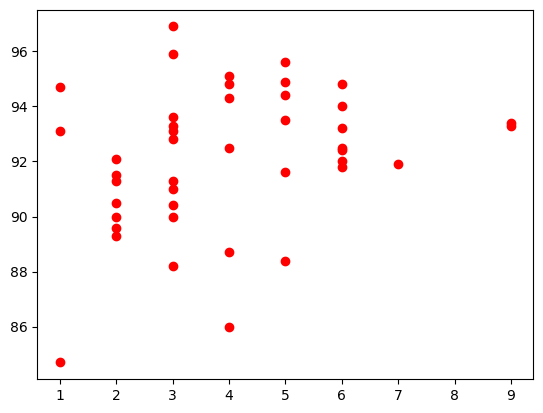

In [34]:
ax = plt.scatter(x = locked_female_possum["age"], y = locked_female_possum["hdlngth"], c = 'Red' )

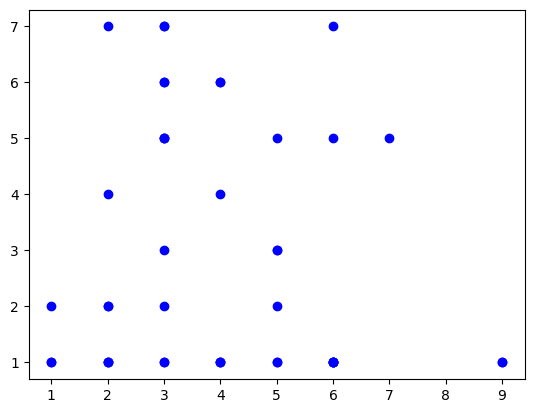

In [37]:
ax2 = plt.scatter(x = locked_female_possum["age"], y = female_possum["site"], c = 'Blue' )

In [35]:
lower_bound_male = Q1_male -(1.5*male_iqr)
upper_bound_male = Q3_male + (1.5 * male_iqr)

lower_bound_male

age         -2.50
hdlngth     83.65
skullw      48.50
totlngth    75.75
taill       31.75
footlgth    54.00
earconch    34.30
eye         12.40
chest       20.50
belly       23.75
dtype: float64

In [36]:
lower_bound_female = Q1_female -(1.5*female_iqr)
upper_bound_female = Q3_female + (1.5 * female_iqr)